# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_AKARI-NEP_cat.fits')

In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J175711.765+661158.976,269.299020211287,66.1997156821774,40.858242,82.53075,14.067983,26.658957,58.03313,8.205711,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0005288,1.0002892,2000.0,2000.0,0.0,0.0
HELP_J175709.110+661123.802,269.287957491287,66.1899449521774,464.40414,806.77124,148.13544,377.50412,713.0687,116.3816,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0004987,0.9988629,1853.0,2000.0,0.0,0.0
HELP_J175707.611+661135.833,269.281711961287,66.19328708217739,460.0177,812.4554,117.00279,396.0712,741.5657,125.60359,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0004743,1.0005558,1432.0,2000.0,0.0,0.0
HELP_J175709.898+661217.529,269.291243391287,66.2048691321774,28.921366,61.23852,8.371357,26.156353,54.595764,8.296818,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,0.99951446,1.0020233,2000.0,2000.0,0.0,0.0
HELP_J175710.003+661142.682,269.29167791498105,66.195189402738,64.16115,134.60901,16.875532,59.39884,122.367386,19.25183,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.001146,0.99986553,2000.0,2000.0,0.0,0.0
HELP_J175712.547+661216.882,269.302277914981,66.204689402738,27.698101,59.444576,8.511883,35.273117,69.03969,11.150563,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0000374,1.0000551,2000.0,2000.0,0.0,0.0
HELP_J175705.659+661159.602,269.27357791498105,66.199889402738,99.10863,179.20007,30.87115,87.28567,192.22754,24.363127,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0000179,0.99988025,2000.0,2000.0,0.0,0.0
HELP_J175709.763+661111.362,269.290677914981,66.186489402738,484.53085,855.7118,151.50288,481.82605,836.0123,169.29182,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,0.99892074,1.0000185,2000.0,1805.0,0.0,0.0


In [4]:
cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J175711.765+661158.976,269.299020211287,66.1997156821774,40.858242,82.53075,14.067983,26.658957,58.03313,8.205711,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0005288,1.0002892,2000.0,2000.0,0.0,0.0
HELP_J175709.110+661123.802,269.287957491287,66.1899449521774,464.40414,806.77124,148.13544,377.50412,713.0687,116.3816,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0004987,0.9988629,1853.0,2000.0,0.0,0.0
HELP_J175707.611+661135.833,269.281711961287,66.19328708217739,460.0177,812.4554,117.00279,396.0712,741.5657,125.60359,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0004743,1.0005558,1432.0,2000.0,0.0,0.0
HELP_J175709.898+661217.529,269.291243391287,66.2048691321774,28.921366,61.23852,8.371357,26.156353,54.595764,8.296818,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,0.99951446,1.0020233,2000.0,2000.0,0.0,0.0
HELP_J175710.003+661142.682,269.29167791498105,66.195189402738,64.16115,134.60901,16.875532,59.39884,122.367386,19.25183,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.001146,0.99986553,2000.0,2000.0,0.0,0.0
HELP_J175712.547+661216.882,269.302277914981,66.204689402738,27.698101,59.444576,8.511883,35.273117,69.03969,11.150563,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0000374,1.0000551,2000.0,2000.0,0.0,0.0
HELP_J175705.659+661159.602,269.27357791498105,66.199889402738,99.10863,179.20007,30.87115,87.28567,192.22754,24.363127,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,1.0000179,0.99988025,2000.0,2000.0,0.0,0.0
HELP_J175709.763+661111.362,269.290677914981,66.186489402738,484.53085,855.7118,151.50288,481.82605,836.0123,169.29182,-9.0464164e-05,-0.00011691353,7.066927e-05,9.132369e-05,0.99892074,1.0000185,2000.0,1805.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

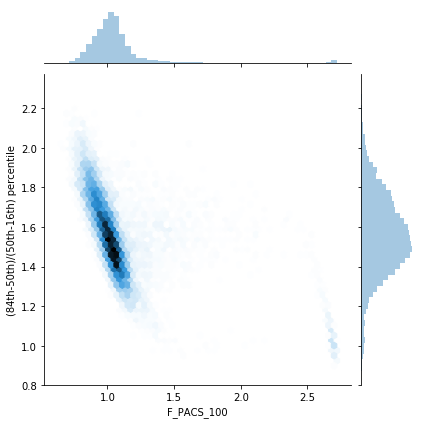

In [6]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_100']),y=skew, kind='hex')

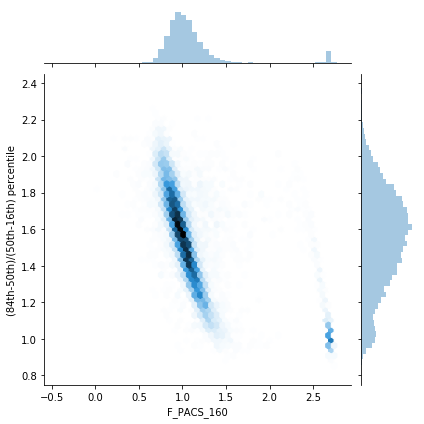

In [8]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_160']),y=skew, kind='hex')

## Add flag to catalogue

In [13]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_100'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_160'))


In [14]:
ind_SWIRE_100=(SWIRE_cat['Pval_res_100']>0.5) | (SWIRE_cat['F_PACS_100'] < 12.5) | ((SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])>150)
ind_SWIRE_160=(SWIRE_cat['Pval_res_160']>0.5) | (SWIRE_cat['F_PACS_160'] < 17.5) | ((SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])>150)


In [15]:
print(ind_SWIRE_100.sum(),ind_SWIRE_160.sum(),len(SWIRE_cat))

19337 86591 86591


In [16]:
SWIRE_cat['flag_PACS_100'][ind_SWIRE_100]=True
SWIRE_cat['flag_PACS_160'][ind_SWIRE_160]=True

In [18]:
SWIRE_cat.write('./data/dmu26_XID+PACS_ELAIS-N2_cat_20190206.fits', format='fits',overwrite=True)


### Check Map

In [9]:
from astropy.io import fits
import pylab as plt

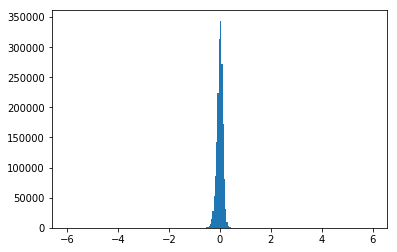

In [12]:
Pval=fits.open('./data/dmu26_XID+PACS_PACS_100_AKARI-NEP_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

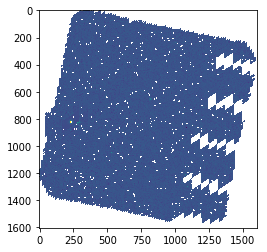

In [13]:
plt.imshow(Pval[1].data)